# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [5]:
print(cities)

['busselton', 'chokurdakh', 'kapaa', 'fort myers beach', 'hithadhoo', 'shaartuz', 'kodiak', 'jamestown', 'rikitea', 'mar del plata', 'aswan', 'illoqqortoormiut', 'namibe', 'katobu', 'fare', 'arlit', 'kahului', 'hermanus', 'port lincoln', 'chapais', 'terra nova', 'ranchpar', 'mataura', 'punta arenas', 'grand river south east', 'sri aman', 'wahiawa', 'klaksvik', 'soritor', 'amderma', 'port alfred', 'taolanaro', 'puerto ayora', 'tasiilaq', 'sentyabrskiy', 'ushuaia', 'asau', 'atuona', 'sturgeon bay', 'torbay', 'alice springs', 'mareeba', 'nizhneyansk', 'laguna', 'haines junction', 'sompeta', 'cidreira', 'camana', 'arraial do cabo', 'pescia', 'ponta delgada', 'talcahuano', 'bluff', 'ayan', 'camacha', 'gat', 'college', 'pevek', 'zaozerne', 'juquila', 'hobart', 'albemarle', 'northam', 'miraflores', 'vuktyl', 'tuy hoa', 'ponta do sol', 'sabalgarh', 'road town', 'butaritari', 'joao pinheiro', 'sao joao da barra', 'longyearbyen', 'montevideo', 'la ronge', 'vaini', 'port elizabeth', 'qaanaaq', 'b

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}&units={units}&appid={weather_api_key}&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=aede59189a275c0e36f5d18253d3012e&q=


In [7]:
time.sleep(1)
#setting up several lists to hold the weather info (based on teh HW CSV)
city_id =[]
city_name = []
cloudiness = []
country = []
date =[]
humidity =[]
Lat =[]
Lng =[]
max_temp = []
wind_speed = []
count= 0
set_count =1
record_count = 0

pprint(cities)  

['busselton',
 'chokurdakh',
 'kapaa',
 'fort myers beach',
 'hithadhoo',
 'shaartuz',
 'kodiak',
 'jamestown',
 'rikitea',
 'mar del plata',
 'aswan',
 'illoqqortoormiut',
 'namibe',
 'katobu',
 'fare',
 'arlit',
 'kahului',
 'hermanus',
 'port lincoln',
 'chapais',
 'terra nova',
 'ranchpar',
 'mataura',
 'punta arenas',
 'grand river south east',
 'sri aman',
 'wahiawa',
 'klaksvik',
 'soritor',
 'amderma',
 'port alfred',
 'taolanaro',
 'puerto ayora',
 'tasiilaq',
 'sentyabrskiy',
 'ushuaia',
 'asau',
 'atuona',
 'sturgeon bay',
 'torbay',
 'alice springs',
 'mareeba',
 'nizhneyansk',
 'laguna',
 'haines junction',
 'sompeta',
 'cidreira',
 'camana',
 'arraial do cabo',
 'pescia',
 'ponta delgada',
 'talcahuano',
 'bluff',
 'ayan',
 'camacha',
 'gat',
 'college',
 'pevek',
 'zaozerne',
 'juquila',
 'hobart',
 'albemarle',
 'northam',
 'miraflores',
 'vuktyl',
 'tuy hoa',
 'ponta do sol',
 'sabalgarh',
 'road town',
 'butaritari',
 'joao pinheiro',
 'sao joao da barra',
 'longyearb

In [8]:
#Loop through cities, append them to the relevant lists and print out the outcome 
for city in cities:
    time.sleep(1)
    count= count + 1 
    
    
    try:
        
        response =requests.get(query_url + city).json()
        city_id.append(response["id"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
 # start a new set every 50 cities       
        if count > 49:
            count =0
            set_count+= 1
                          
        
            
        else:                  
            print(f"processing Record {count} of set {set_count}| {city}")  
    except(KeyError, IndexError):
        print("City not found, skipping")

processing Record 1 of set 1| busselton
processing Record 2 of set 1| chokurdakh
processing Record 3 of set 1| kapaa
processing Record 4 of set 1| fort myers beach
processing Record 5 of set 1| hithadhoo
City not found, skipping
processing Record 7 of set 1| kodiak
processing Record 8 of set 1| jamestown
processing Record 9 of set 1| rikitea
processing Record 10 of set 1| mar del plata
processing Record 11 of set 1| aswan
City not found, skipping
processing Record 13 of set 1| namibe
processing Record 14 of set 1| katobu
processing Record 15 of set 1| fare
processing Record 16 of set 1| arlit
processing Record 17 of set 1| kahului
processing Record 18 of set 1| hermanus
processing Record 19 of set 1| port lincoln
processing Record 20 of set 1| chapais
processing Record 21 of set 1| terra nova
processing Record 22 of set 1| ranchpar
processing Record 23 of set 1| mataura
processing Record 24 of set 1| punta arenas
City not found, skipping
processing Record 26 of set 1| sri aman
processi

processing Record 18 of set 5| napoleon
processing Record 19 of set 5| guerrero negro
City not found, skipping
processing Record 21 of set 5| srivardhan
processing Record 22 of set 5| cam ranh
processing Record 23 of set 5| duku
processing Record 24 of set 5| quelimane
City not found, skipping
processing Record 26 of set 5| santa cruz
processing Record 27 of set 5| togur
processing Record 28 of set 5| guatire
processing Record 29 of set 5| zyryanka
processing Record 30 of set 5| waipawa
processing Record 31 of set 5| victoria
processing Record 32 of set 5| lhokseumawe
processing Record 33 of set 5| kanniyakumari
processing Record 34 of set 5| tarauaca
City not found, skipping
processing Record 36 of set 5| constitucion
processing Record 37 of set 5| tutoia
processing Record 38 of set 5| port pirie
processing Record 39 of set 5| umm kaddadah
processing Record 40 of set 5| kokoda
processing Record 41 of set 5| goderich
processing Record 42 of set 5| qaqortoq
processing Record 43 of set 5

processing Record 33 of set 9| sobradinho
processing Record 34 of set 9| santa fe
processing Record 35 of set 9| jijiga
processing Record 36 of set 9| bensonville
processing Record 37 of set 9| fethiye
processing Record 38 of set 9| margate
processing Record 39 of set 9| sovetskaya gavan
processing Record 40 of set 9| umtata
City not found, skipping
processing Record 42 of set 9| ondjiva
processing Record 43 of set 9| gazanjyk
City not found, skipping
City not found, skipping
processing Record 46 of set 9| mkushi
processing Record 47 of set 9| danilov
processing Record 48 of set 9| qeshm
processing Record 49 of set 9| mindelheim
processing Record 1 of set 10| benjamin hill
processing Record 2 of set 10| mandalgovi
processing Record 3 of set 10| new london
processing Record 4 of set 10| asosa
processing Record 5 of set 10| buala
processing Record 6 of set 10| niamey
processing Record 7 of set 10| faanui
City not found, skipping
processing Record 9 of set 10| bilibino
processing Record 1

In [9]:
my_weather_data= pd.DataFrame({"City_ID": city_id , "City" : city_name, "Cloudiness" :cloudiness , "Country": country, "Date": date, "Humidity":humidity, "Lat": Lat, "Lng": Lng, "Max Temp":max_temp , "Wind Speed": wind_speed})
my_weather_data.head(20)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2075265,Busselton,0,AU,1680458211,92,-33.6500,115.3333,59.36,9.15
1,2126123,Chokurdakh,47,RU,1680458213,98,70.6333,147.9167,-17.93,9.51
2,5848280,Kapaa,75,US,1680458214,93,22.0752,-159.3190,71.92,5.75
3,4155996,Fort Myers Beach,0,US,1680458215,70,26.4520,-81.9481,89.06,9.22
4,1282256,Hithadhoo,58,MV,1680458216,72,-0.6000,73.0833,82.72,7.70
5,5866583,Saint Paul Harbor,0,US,1680458033,59,57.7900,-152.4072,31.51,11.50
6,5122534,Jamestown,0,US,1680458218,37,42.0970,-79.2353,39.52,9.22
7,4030556,Rikitea,45,PF,1680458220,80,-23.1203,-134.9692,80.53,14.63
8,3430863,Mar del Plata,0,AR,1680458221,45,-38.0023,-57.5575,77.95,6.91
9,359792,Aswān,0,EG,1680458222,13,24.0934,32.9070,81.70,6.91


In [15]:
my_weather_data.to_csv(output_data_file, index= False) #, index_label ="City_ID")

In [12]:
#corrected-data_path = 'weatherAPI_data.csv'
corrected_data_path = "../output_data/cities.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df.head(20)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2075265,Busselton,0,AU,1680458211,92,-33.6500,115.3333,59.36,9.15
1,2126123,Chokurdakh,47,RU,1680458213,98,70.6333,147.9167,-17.93,9.51
2,5848280,Kapaa,75,US,1680458214,93,22.0752,-159.3190,71.92,5.75
3,4155996,Fort Myers Beach,0,US,1680458215,70,26.4520,-81.9481,89.06,9.22
4,1282256,Hithadhoo,58,MV,1680458216,72,-0.6000,73.0833,82.72,7.70
5,5866583,Saint Paul Harbor,0,US,1680458033,59,57.7900,-152.4072,31.51,11.50
6,5122534,Jamestown,0,US,1680458218,37,42.0970,-79.2353,39.52,9.22
7,4030556,Rikitea,45,PF,1680458220,80,-23.1203,-134.9692,80.53,14.63
8,3430863,Mar del Plata,0,AR,1680458221,45,-38.0023,-57.5575,77.95,6.91
9,359792,Aswān,0,EG,1680458222,13,24.0934,32.9070,81.70,6.91


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

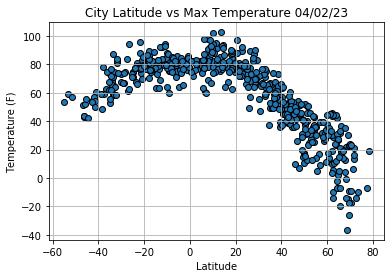

In [13]:
date = time.strftime("%m/%d/%y") 
lat_data = corrected_data_df["Lat"]
temp_data = corrected_data_df["Max Temp"]
plt.scatter(lat_data, temp_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {date}")
plt.savefig("../output_data/Lat_vs_temp.png")
plt.show()

#### Latitude Vs. Humidity

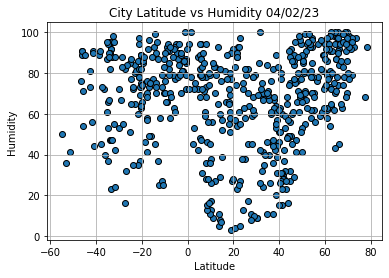

In [16]:
hume_data = corrected_data_df["Humidity"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.title(f"City Latitude vs Humidity {date}")
plt.savefig("../output_data/Lat_vs_hume.png")
plt.show()

#### Latitude Vs. Cloudiness

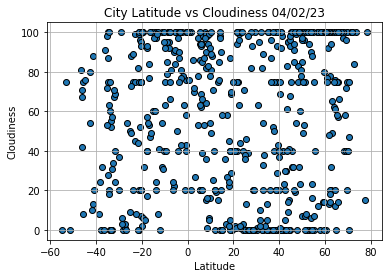

In [17]:
cloud_data = corrected_data_df["Cloudiness"]
plt.scatter(lat_data, cloud_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness {date}")
plt.savefig("../output_data/Lat_vs_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

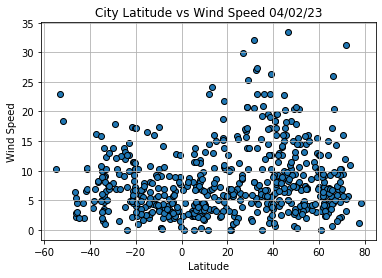

In [18]:
hume_data = corrected_data_df["Wind Speed"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed {date}")
plt.savefig("../output_data/Lat_vs_Wind_Speed.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
def linear_regression(x,y,y_label,coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"the r-value is : {rvalue**2}")
    plt.xlabel('Latitutde')
    plt.ylabel(y_label)
    plt.show()

the r-value is : 0.7897239834205049


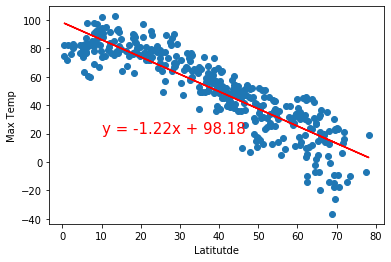

In [20]:
#make a regin with lat (0,80)
#Correlating the 
nh_mt = corrected_data_df[corrected_data_df["Lat"] >=0]
nh_mt

    
x= nh_mt["Lat"]
y= nh_mt["Max Temp"]
linear_regression(x,y,"Max Temp",(10,20))

the r-value is : 0.446753803972201


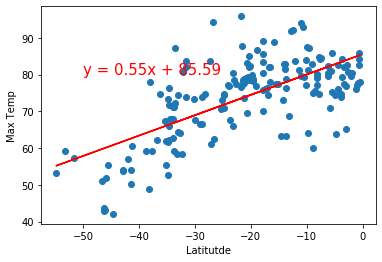

In [21]:
sh_mt = corrected_data_df[corrected_data_df["Lat"] < 0]
sh_mt

x= sh_mt["Lat"]
y= sh_mt["Max Temp"]
linear_regression(x,y,"Max Temp",(-50,80))

the r-value is : 0.040431501463612324


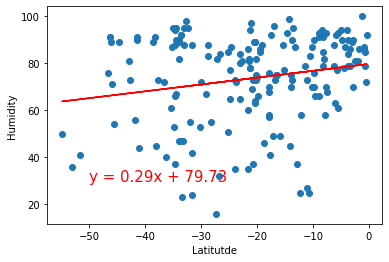

In [22]:
x= sh_mt["Lat"]
y= sh_mt["Humidity"]
linear_regression(x,y,"Humidity",(-50,30))

the r-value is : 0.020568233440674245


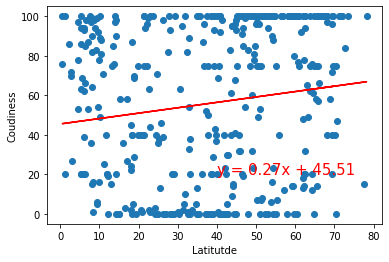

In [23]:
x= nh_mt["Lat"]
y= nh_mt["Cloudiness"]
linear_regression(x,y,"Coudiness",(40,20))

the r-value is : 0.11184729433451096


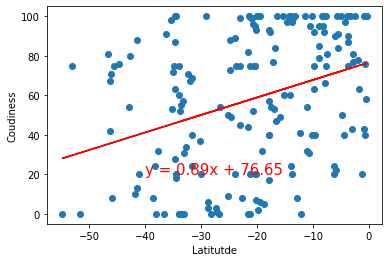

In [24]:
x= sh_mt["Lat"]
y= sh_mt["Cloudiness"]
linear_regression(x,y,"Coudiness",(-40,20))

the r-value is : 0.005743599859524604


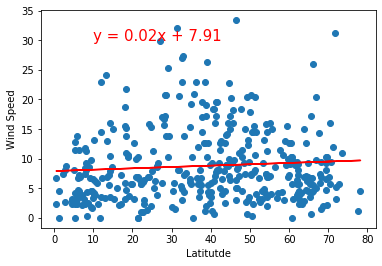

In [25]:
x= nh_mt["Lat"]
y= nh_mt["Wind Speed"]
linear_regression(x,y,"Wind Speed",(10,30))

the r-value is : 0.04539307338221953


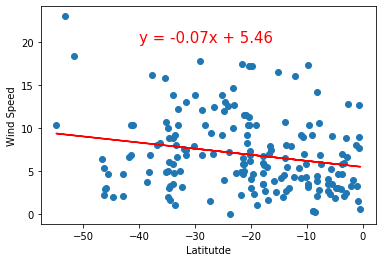

In [26]:
x= sh_mt["Lat"]
y= sh_mt["Wind Speed"]
linear_regression(x,y,"Wind Speed",(-40,20))